##Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import plotly.offline as py
import plotly.graph_objs as go


##Importando dados

In [ ]:
data = pd.read_csv('/content/marketing_campaign.csv',sep = '\t')
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


##Fazendo manipulações

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#substituindo a coluna Year_Birth pela idade até 2021
Year_Birth = data['Year_Birth']
anos = (2015- Year_Birth).round()
anos = anos.astype('int64')
data['Year_Birth'] = anos
data.rename(columns={'Year_Birth': 'Age'},inplace= True)
data.head(10)

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,58,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,61,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,50,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,31,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,34,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,48,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,44,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,30,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,41,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,65,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
def exclui_outliers(data, col_name):
  intervalo = 2*data[col_name].std()
  media = data[col_name].mean()
  data.loc[data[col_name] < (media - intervalo), col_name] = np.nan
  data.loc[data[col_name] > (media + intervalo), col_name] = np.nan

numerical_cols = ['Age','Recency','MntWines','MntFruits','MntMeatProducts',
                  'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
                  'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for col in numerical_cols:
  exclui_outliers(data, col)

In [ ]:
data.isna().sum()

ID                       0
Age                     34
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines               128
MntFruits              155
MntMeatProducts        135
MntFishProducts        163
MntSweetProducts       150
MntGoldProds           146
NumDealsPurchases       86
NumWebPurchases         91
NumCatalogPurchases    113
NumStorePurchases       83
NumWebVisitsMonth       20
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [ ]:
#tratando valores faltantes
data['Income'].fillna(data['Income'].median(),inplace = True)
data['Age'].fillna(data['Age'].median(),inplace = True)
data['MntWines'].fillna(data['MntWines'].median(),inplace = True)
data['MntFruits'].fillna(data['MntFruits'].median(),inplace = True)
data['MntMeatProducts'].fillna(data['MntMeatProducts'].median(),inplace = True)
data['MntFishProducts'].fillna(data['MntFishProducts'].median(),inplace = True)
data['MntSweetProducts'].fillna(data['MntSweetProducts'].median(),inplace = True)
data['MntGoldProds'].fillna(data['MntGoldProds'].median(),inplace = True)
data['NumDealsPurchases'].fillna(data['NumDealsPurchases'].median(),inplace = True)
data['NumWebVisitsMonth'].fillna(data['NumWebVisitsMonth'].median(),inplace = True)
data['NumWebPurchases'].fillna(data['NumWebPurchases'].median(),inplace = True)
data['NumCatalogPurchases'].fillna(data['NumCatalogPurchases'].median(),inplace = True)
data['NumStorePurchases'].fillna(data['NumStorePurchases'].median(),inplace = True)


##Definindo Público alvo

###Idade

Text(0, 0.5, 'Frequência Absoluta')

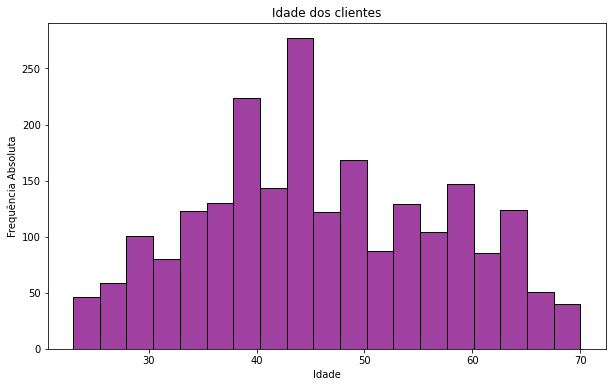

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Age',data = data, color='Purple')
plt.title('Idade dos clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

Text(0, 0.5, 'Idade')

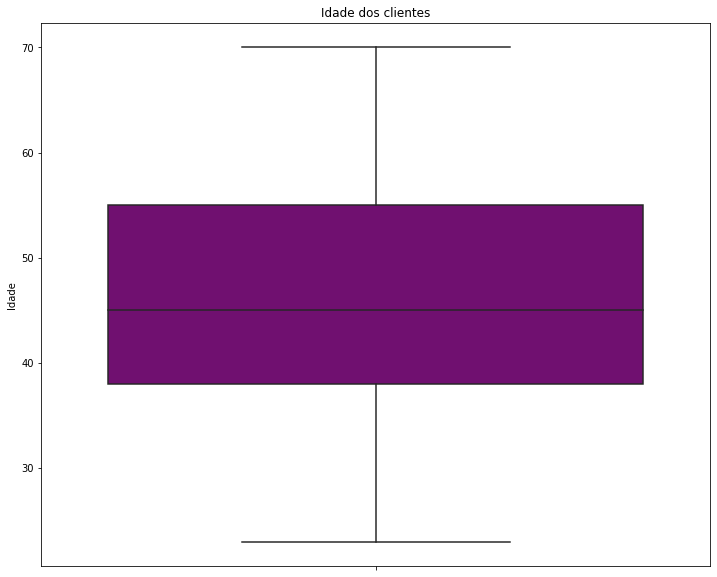

In [ ]:
plt.figure(figsize=(12, 10))
idades = sns.boxplot(y = 'Age',data = data, color='purple')
plt.title('Idade dos clientes')
plt.ylabel('Idade')



In [ ]:
data['Age'].describe()

count    2240.000000
mean       46.067411
std        11.300176
min        23.000000
25%        38.000000
50%        45.000000
75%        55.000000
max        70.000000
Name: Age, dtype: float64

###estado civil

In [ ]:
data.replace('YOLO','no_response',inplace=True)
data.replace('Absurd','no_response',inplace=True)
data.replace('Alone','Single',inplace=True)

Text(0.5, 0, 'Estado Civil')

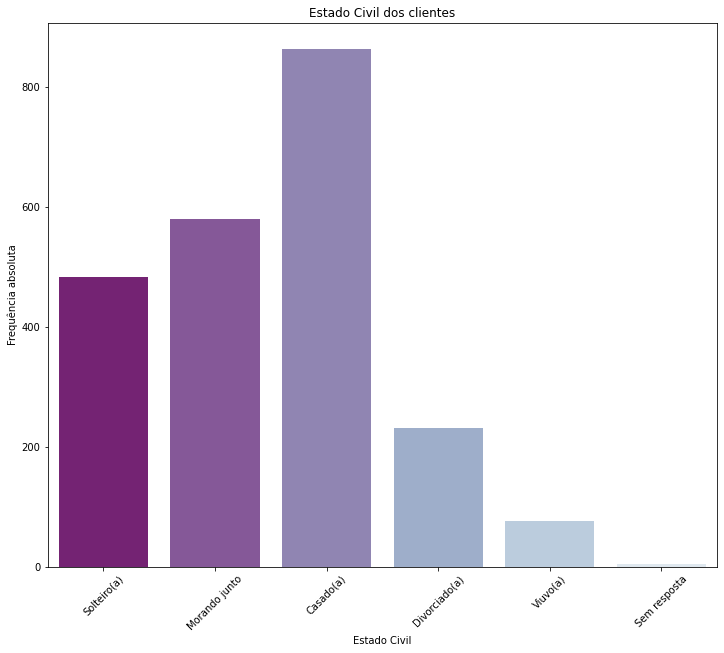

In [ ]:
plt.figure(figsize=(12, 10))
estado_civil = sns.countplot(x = 'Marital_Status',data = data, palette='BuPu_r')
plt.title('Estado Civil dos clientes')
plt.ylabel('Frequência absoluta')
tick_labels = ['Solteiro(a)','Morando junto','Casado(a)','Divorciado(a)','Viuvo(a)','Sem resposta',]
estado_civil.set_xticklabels(tick_labels)
plt.xticks(rotation=45)
plt.xlabel('Estado Civil')

###Educação

Text(0.5, 0, 'Grau escolar')

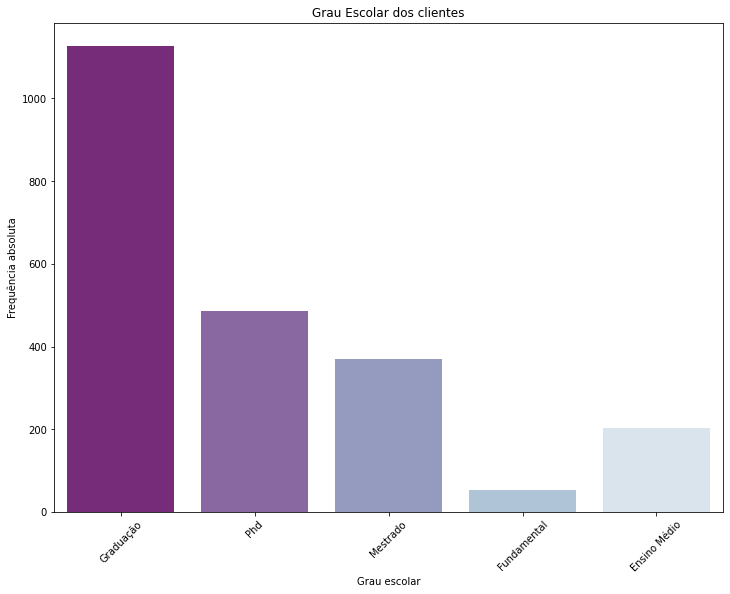

In [ ]:
plt.figure(figsize=(12, 9))

educacao = sns.countplot(x = 'Education',data = data, palette='BuPu_r')
plt.title('Grau Escolar dos clientes')
plt.ylabel('Frequência absoluta')
tick_labels = ['Graduação','Phd','Mestrado','Fundamental','Ensino Médio',]
educacao.set_xticklabels(tick_labels)
plt.xticks(rotation=45)
plt.xlabel('Grau escolar')

In [ ]:
data['Education'].describe()

count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object

###Filhos em casa

In [ ]:
num_filhos = data['Kidhome'] + data['Teenhome']
data['num_filhos']=num_filhos

Text(0.5, 0, 'Quantidade de filhos')

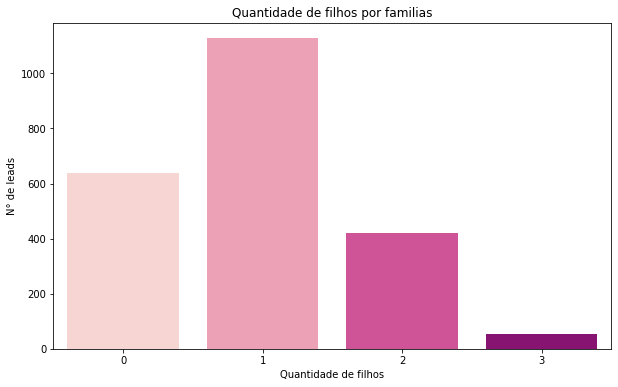

In [ ]:
plt.figure(figsize=(10, 6))
idades = sns.countplot(x = 'num_filhos',data = data, palette='RdPu')
plt.title('Quantidade de filhos por familias')
plt.ylabel('N° de leads')
plt.xlabel('Quantidade de filhos')

###Renda Familiar

Text(0, 0.5, 'Salário anual')

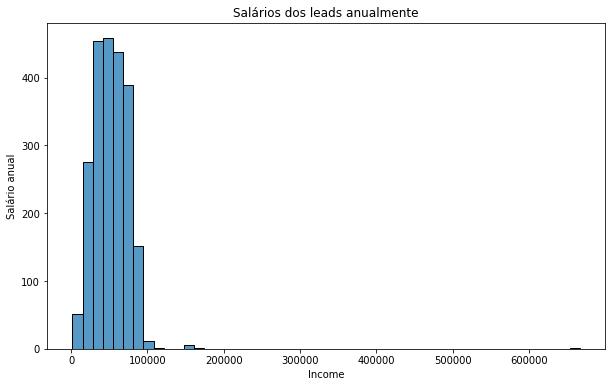

In [ ]:
plt.figure(figsize=(10, 6))
idades = sns.histplot(x = 'Income',data = data, palette='RdPu',bins=50)
plt.title('Salários dos leads anualmente')
plt.ylabel('Salário anual')

Text(0, 0.5, 'Salario(UR$)')

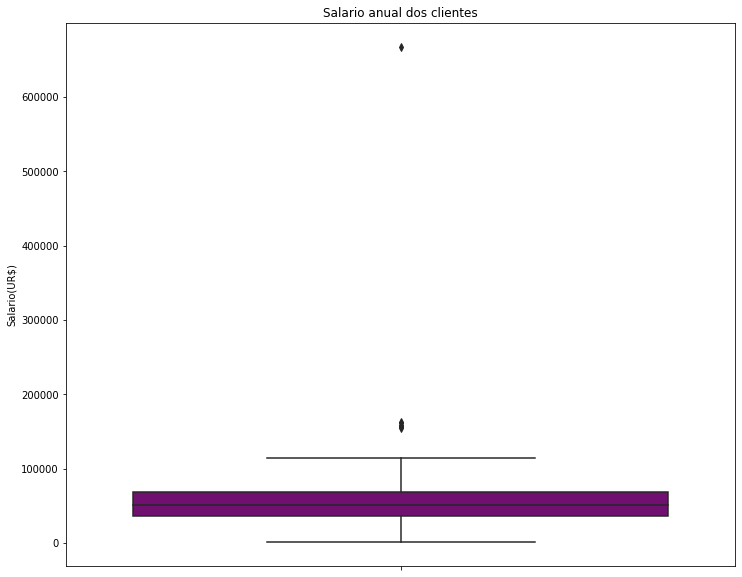

In [ ]:
plt.figure(figsize=(12, 10))
idades = sns.boxplot(y = 'Income',data = data, color='purple')
plt.title('Salario anual dos clientes')
plt.ylabel('Salario(UR$)')

In [ ]:
data['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

##Campanha

In [ ]:
colunas_selecionadas = ['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1','AcceptedCmp2']
new_data = data.filter(items=colunas_selecionadas)
new_data.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
totais = new_data['AcceptedCmp3'] + new_data['AcceptedCmp1'] + new_data['AcceptedCmp4'] + new_data['AcceptedCmp5'] + new_data['AcceptedCmp2']
new_data['Totais'] = totais
new_data.describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Totais
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.297768
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.678381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
camp1 = sum(new_data['AcceptedCmp1'])
camp2 = sum(new_data['AcceptedCmp2'])
camp3 = sum(new_data['AcceptedCmp3'])
camp4 = sum(new_data['AcceptedCmp4'])
camp5 = sum(new_data['AcceptedCmp5'])

In [ ]:
totais_de_respostas = sum(new_data['Totais'])
totais_de_respostas

667

In [ ]:
campanhas = ['camp1','camp2','camp3','camp4','camp5']
totais = [camp1,camp2,camp3,camp4,camp5]
df = pd.DataFrame({'campanhas':campanhas,
                   'totais':totais})
print(df)

  campanhas  totais
0     camp1     144
1     camp2      30
2     camp3     163
3     camp4     167
4     camp5     163


In [ ]:
med = df['totais'].mean()
tot = sum(df['totais'])

Text(0.5, 0, 'Campanhas')

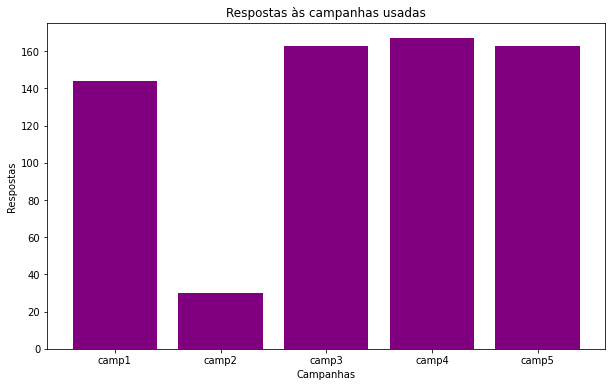

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.bar('campanhas','totais',data = df, color = 'purple')
plt.title('Respostas às campanhas usadas')
plt.ylabel('Respostas')
plt.xlabel('Campanhas')

##Produtos

In [ ]:
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,num_filhos
0,5524,58.0,Graduation,Single,58138.0,0,0,04-09-2012,58.0,635.0,88.0,546.0,10.0,88.0,88.0,3.0,8.0,1.0,4.0,7.0,0,0,0,0,0,0,3,11,1,0
1,2174,61.0,Graduation,Single,46344.0,1,1,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0,3,11,0,2
2,4141,50.0,Graduation,Together,71613.0,0,0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0,3,11,0,0
3,6182,31.0,Graduation,Together,26646.0,1,0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0,3,11,0,1
4,5324,34.0,PhD,Married,58293.0,1,0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0,3,11,0,1


In [ ]:
colunas1 = ['Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
produtos = data.filter(items=colunas1)
produtos.head()

,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,04-09-2012,58.0,635.0,88.0,546.0,10.0,88.0,88.0
1,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0
2,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0
3,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0
4,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0


In [ ]:
produtos.describe()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,49.109375,247.013393,16.947768,121.328125,24.426786,17.600893,32.911607
std,28.962453,263.157221,23.335092,148.954354,33.243616,24.604992,33.707571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,49.000000,154.000000,7.000000,57.000000,10.000000,7.000000,21.000000
75%,74.000000,410.000000,22.000000,168.000000,32.000000,23.000000,43.000000
max,99.000000,977.000000,105.000000,617.000000,146.000000,109.000000,148.000000


In [ ]:
wine = sum(produtos['MntWines'])
fruits = sum(produtos['MntFruits'])
meat = sum(produtos['MntMeatProducts'])
fish = sum(produtos['MntFishProducts'])
sweet = sum(produtos['MntSweetProducts'])
gold = sum(produtos['MntGoldProds'])

In [ ]:
prod = ['wine','fruits','meat','fish','sweet','gold']
prod_total = [wine,fruits,meat,fish,sweet,gold]
produtos_vendidos = pd.DataFrame({'produtos':prod,
                   'totais':prod_total})
print(produtos_vendidos)

  produtos    totais
0     wine  553310.0
1   fruits   37963.0
2     meat  271775.0
3     fish   54716.0
4    sweet   39426.0
5     gold   73722.0


Text(0.5, 0, 'Produtos')

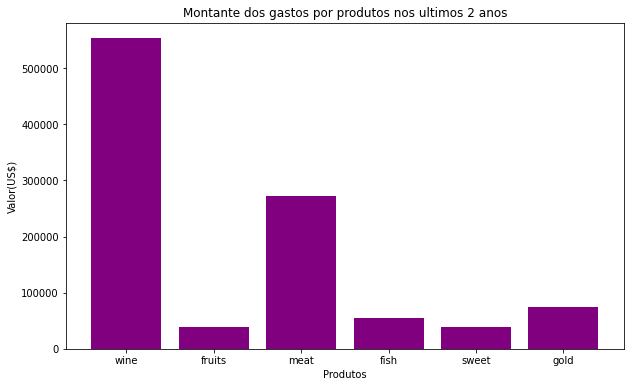

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.bar('produtos','totais',data = produtos_vendidos, color = 'purple')
plt.title('Montante dos gastos por produtos nos ultimos 2 anos')
plt.ylabel('Valor(US$)')
plt.xlabel('Produtos')

In [ ]:
#maximo de dias desde a última compra
produtos['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [ ]:
produtos[['dia','mes','ano']] = produtos['Dt_Customer'].str.split('-',expand = True)
produtos

,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,dia,mes,ano
0,04-09-2012,58.0,635.0,88.0,546.0,10.0,88.0,88.0,04,09,2012
1,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,08,03,2014
2,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,21,08,2013
3,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,10,02,2014
4,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,19,01,2014
...,...,...,...,...,...,...,...,...,...,...,...
2235,13-06-2013,46.0,709.0,43.0,182.0,42.0,7.0,21.0,13,06,2013
2236,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,10,06,2014
2237,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,25,01,2014
2238,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,24,01,2014


Text(0.5, 1.0, 'Correlção entre os produtos')

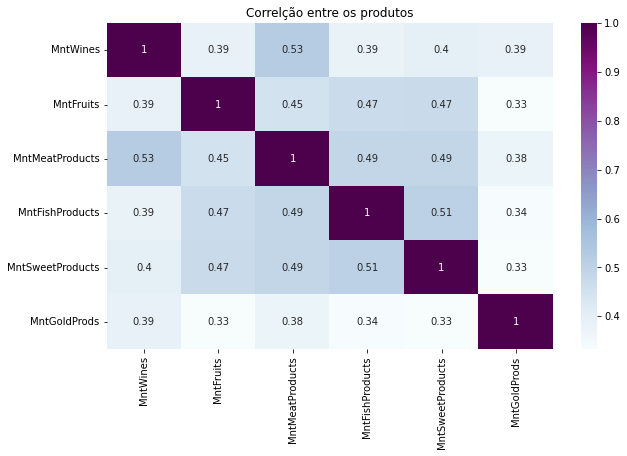

In [ ]:
plt.figure(figsize=(10, 6))
corr=produtos[['MntWines','MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds']].corr()
ax = sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title('Correlção entre os produtos')

In [ ]:
freq_mes = pd.DataFrame(produtos.groupby('mes').size(), columns=['freq'])

In [ ]:
sort_order = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [ ]:
freq_mes = freq_mes.reset_index()

In [ ]:
freq_mes.index = pd.CategoricalIndex(freq_mes['mes'], categories=sort_order, ordered=True)
freq_mes.sort_index(inplace=True)

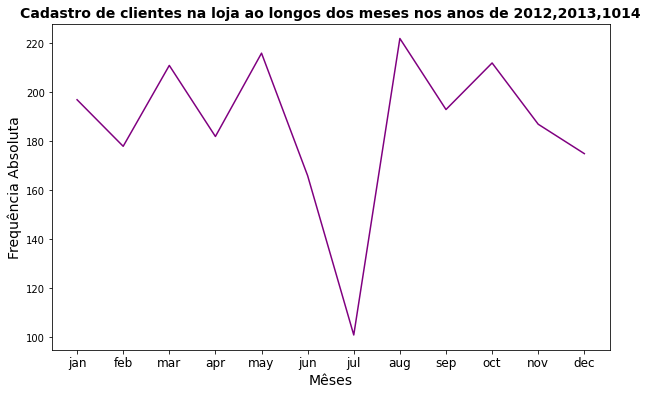

In [ ]:
plt.figure(figsize=(10, 6))
plt.tight_layout()
plot_mes = sns.lineplot(x='mes', y = 'freq', data=freq_mes, color = 'purple')
plot_mes.set_xticklabels(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], rotation=0, fontsize=12)
plot_mes.set_xlabel('Mêses', fontsize=14)
plot_mes.set_ylabel('Frequência Absoluta', fontsize=14)
plt.yticks(fontsize=10)
plot_mes.set_title('Cadastro de clientes na loja ao longos dos meses nos anos de 2012,2013,1014', fontsize=14, fontweight='bold')
fig = plot_mes.get_figure()

Text(0, 0.5, 'Frequência')

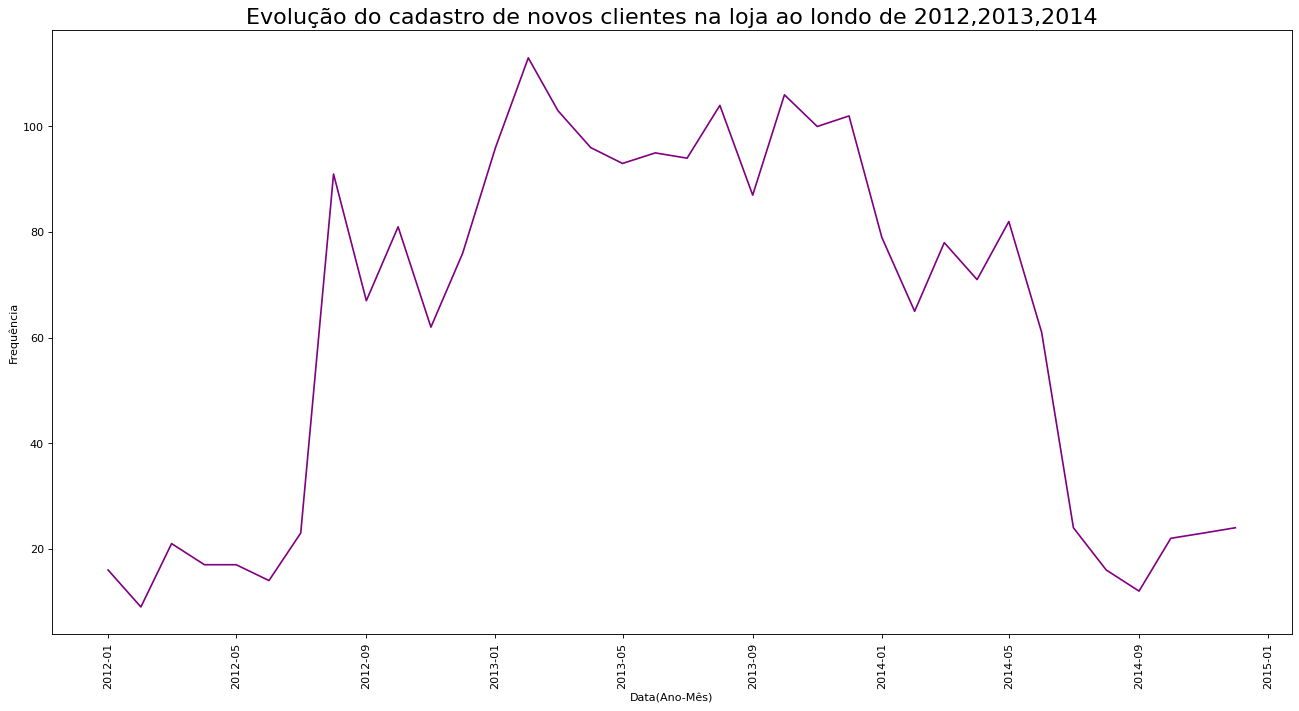

In [ ]:
df =  pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%Y-%m')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m')
freq_ano = pd.DataFrame(df.groupby('Dt_Customer').size(), columns=['freq'])


plt.figure(figsize=(20,10), dpi=80)
plot_ano = sns.lineplot(x='Dt_Customer', y = 'freq', data=freq_ano, color='purple')
plt.xticks(rotation = 90)
plt.title('Evolução do cadastro de novos clientes na loja ao londo de 2012,2013,2014',fontsize = 20)
plt.xlabel('Data(Ano-Mês)')
plt.ylabel('Frequência')

##Melhor veículo de vendas

In [ ]:
colunas2 = ['Recency','NumDealsPurchases',	'NumWebPurchases','NumCatalogPurchases',	'NumStorePurchases','NumWebVisitsMonth']
veiculos_de_vendas = data.filter(items=colunas2)
veiculos_de_vendas.head()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58.0,3.0,8.0,1.0,4.0,7.0
1,38.0,2.0,1.0,1.0,2.0,5.0
2,26.0,1.0,8.0,2.0,10.0,4.0
3,26.0,2.0,2.0,0.0,4.0,6.0
4,94.0,5.0,5.0,3.0,6.0,5.0


In [ ]:

website = sum(veiculos_de_vendas['NumWebPurchases'])
catalogo = sum(veiculos_de_vendas['NumCatalogPurchases'])
loja_fisica = sum(veiculos_de_vendas['NumStorePurchases'])

In [ ]:
totalzao = website + catalogo + loja_fisica
totalzao

25616.0

In [ ]:
site = round((website/totalzao)*100)
cat = round((catalogo/totalzao)*100)
fisica = round((loja_fisica/totalzao)*100)

In [ ]:
veic = ['website','catalogo','loja_fisica']
veic_total = [site,cat,fisica]
veiculos = pd.DataFrame({'veiculo':veic,
                   'totais': veic_total})
print(veiculos)

       veiculo  totais
0      website      33
1     catalogo      19
2  loja_fisica      48


Text(0.5, 0, 'Veículos')

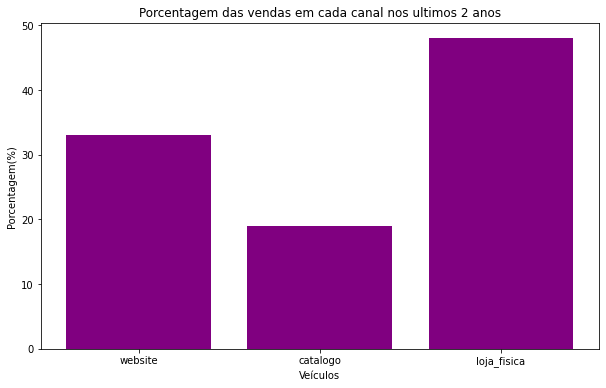

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.bar('veiculo','totais',data = veiculos, color = 'purple')
plt.title('Porcentagem das vendas em cada canal nos ultimos 2 anos')
plt.ylabel('Porcentagem(%)')
plt.xlabel('Veículos')

##Número de visitas no site em comparação com número de compras feitas no site da empresa?

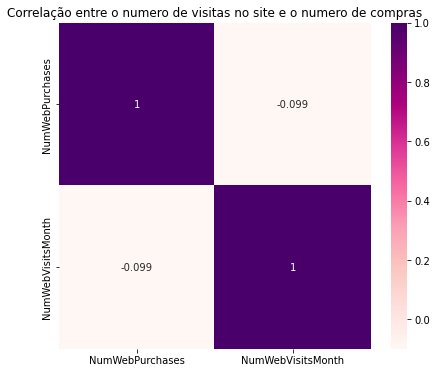

In [ ]:
plt.figure(figsize = (7,6))
corr=veiculos_de_vendas[['NumWebPurchases', 'NumWebVisitsMonth']].corr()
plt.title('Correlação entre o numero de visitas no site e o numero de compras')
ax = sns.heatmap(corr, annot=True, cmap="RdPu")

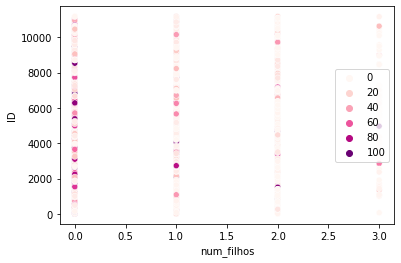

In [ ]:
ax = sns.scatterplot(x = 'num_filhos',y = 'ID',hue = 'MntSweetProducts',data=data, palette='RdPu')
plt.legend(loc = 5)



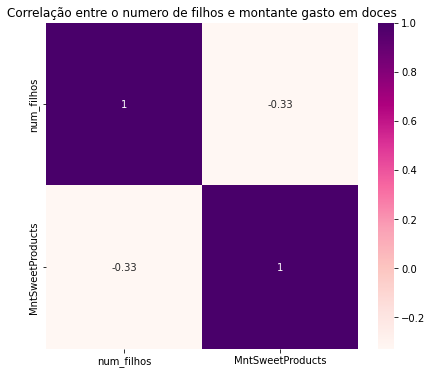

In [ ]:
corr = plt.figure(figsize = (7,6))
corr=data[['num_filhos', 'MntSweetProducts']].corr()
plt.title('Correlação entre o numero de filhos e montante gasto em doces')
ax = sns.heatmap(corr, annot=True, cmap="RdPu")